## 9-3 LSTM과 GRU 셀  
앞서 배운 SimpleRNN을 넘어 고급 순환층인 LSTM과 GRU에 대해 알아보자! 당연히 기존 단순 RNN보다 훨씬 계산이 복잡하지만  
훨씬 성능이 뛰어나기 때문에 순환 신경망에 많이 채택이 되고 있다! 일반적으로 SimpleRNN은 긴 시퀀스를 학습하기 어렵다!  
왜냐면 시퀀스가 길수록 순환된느 Hidden state에 담긴 정보가 점차 희석되기 때문이다! 따라서 멀리 떨어져 있는 단어 정보를  
인식하는데 어려울 수 있다. 이를 해결하기 위해 발명된 것이 바로 LSTM과 GRU이다!

#### LSTM의 구조  
LSTM은 Long-Short Term Memory의 약자로 말 그대로 단기 기억을 오래하기 위해 고안되었다! LSTM은 구조가 복잡하므로 단계적으로  
알아보자! 하지만 기본 개념은 동일하다고 한다. LSTM에는 입력과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조를  
여러개 가지고 있다. 이런 계산 결과는 다음 time-step에 재사용된다.  
먼저 은닉상태를 만드는 방법을 알아보자! 은닉 상태 즉, hidden-state는 이전 time-step의 가중치를 곱한 후 활성화 함수를 통과시켜  
다음 은닉 상태로 만든다. 이때 SimpleRNN과 달리 sigmoid 활성화 함수를 사용한다.

In [1]:
# LSTM 신경망 훈련하기
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_taget), (test_input, test_taget) = imdb.load_data(num_words=500)
train_input, val_input, train_taget, val_target = train_test_split(train_input, train_taget, test_size=0.2, random_state=42)

e:\HongongML-DL_stduy\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
e:\HongongML-DL_stduy\venv\Lib\site-packages\numpy\lib\_format_impl.py:838: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  array = pickle.load(fp, **pickle_kwargs)


In [2]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
import keras

model_lstm = keras.Sequential()
model_lstm.add(keras.layers.Input(shape=(100,)))
model_lstm.add(keras.layers.Embedding(500, 16))
model_lstm.add(keras.layers.LSTM(8))
model_lstm.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_lstm.fit(train_seq, train_taget, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.7043 - loss: 0.5717 - val_accuracy: 0.7658 - val_loss: 0.4943
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.7846 - loss: 0.4633 - val_accuracy: 0.7926 - val_loss: 0.4477
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8000 - loss: 0.4344 - val_accuracy: 0.8018 - val_loss: 0.4384
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8092 - loss: 0.4175 - val_accuracy: 0.8088 - val_loss: 0.4219
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8127 - loss: 0.4082 - val_accuracy: 0.8022 - val_loss: 0.4279
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8158 - loss: 0.4022 - val_accuracy: 0.8060 - val_loss: 0.4206
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8220 - loss: 0.3920 - val_accuracy: 0.8072 - val_loss: 0.4207
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8221 - loss: 0

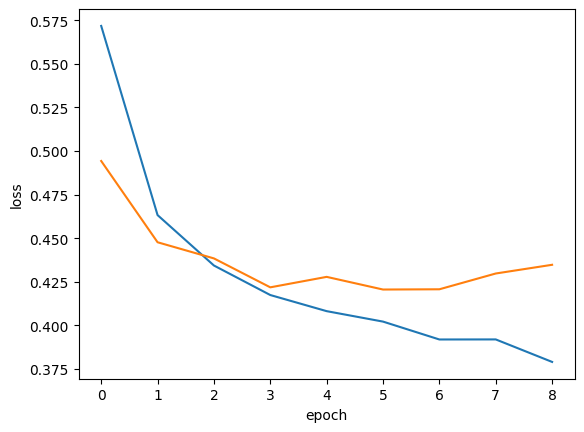

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 순환층에 드롭아웃 적용하기  
완전 연결 신경망과 합성곱 신경망에서는 Dropout 클래스를 사용해 드롭아웃을 적용했다. 이를 통해 모델이 훈련 세트에 너무 과대적합되는 것을 막았다!  
순환층은 자체적으로 드롭아웃 기능을 제공한다. SimpleRNN과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있다!  
dropout 매개변수는 셀의 입력에 드롭아웃을 적용한다! 하지만 기술적인 문제로 인해 recurrent_dropout을 사용하면 GPU를 사용하여 모델을 훈련하지 못한다!  
이 때문에 모델의 훈련 속도가 크게 느려진다. 따라서 여기에서는 dropout만 사용한다!!

In [8]:
model_dropout = keras.Sequential()
model_dropout.add(keras.layers.Input(shape=(100,)))
model_dropout.add(keras.layers.Embedding(500,16))
model_dropout.add(keras.layers.LSTM(8, dropout=0.2))
model_dropout.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_dropout.fit(train_seq, train_taget, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.6894 - loss: 0.5770 - val_accuracy: 0.7844 - val_loss: 0.4696
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7847 - loss: 0.4654 - val_accuracy: 0.7930 - val_loss: 0.4486
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7985 - loss: 0.4388 - val_accuracy: 0.8008 - val_loss: 0.4353
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.8013 - loss: 0.4272 - val_accuracy: 0.8070 - val_loss: 0.4284
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.8076 - loss: 0.4223 - val_accuracy: 0.8000 - val_loss: 0.4277
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.8052 - loss: 0.4184 - val_accuracy: 0.8078 - val_loss: 0.4223
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8072 - loss: 0.4130 - val_accuracy: 0.8014 - val_loss: 0.4275
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.8109 - loss: 0.

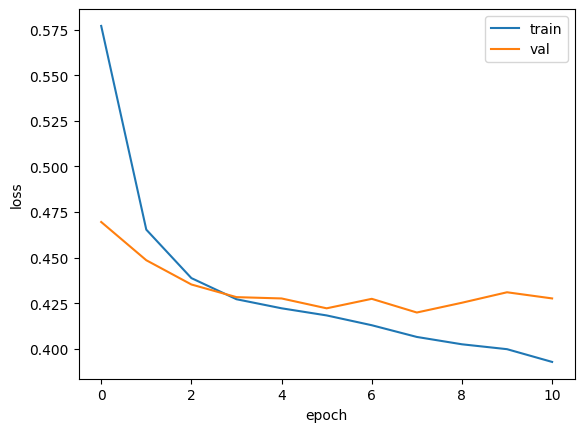

In [11]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### 2개의 층을 연결하기!  
순환층을 연결할 때는 한 가지 주의할 점이 있다. 앞서 언급한대로 순환층의 은닉 상태는 샘플의 마지막 time-step에 대한 은닉 상태만  
다음 층으로 전달한다. 하지만 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요하다. 따라서 앞쪽의 순환층이 모든 time-step에 대한  
은닉 상태를 출력해야 한다! 오직 마지막 순환층만 마지막 time-step의 은닉 상태를 출력해야 한다!

In [12]:
# keras의 순환층에서 모든 time-step의 은닉 상태를 출력하려면 마지막을 제외한 다른 모든 순환층에 return_sequences 매개변수를 True로 지정하면 된다.
model_2lstm = keras.Sequential()
model_2lstm.add(keras.layers.Input(shape=(100,)))
model_2lstm.add(keras.layers.Embedding(500,16))
model_2lstm.add(keras.layers.LSTM(8, dropout=0.2, return_sequences=True))
model_2lstm.add(keras.layers.LSTM(8, dropout=0.2))
model_2lstm.add(keras.layers.Dense(1, activation='sigmoid'))
model_2lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_2lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2lstm-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_2lstm.fit(train_seq, train_taget, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.6651 - loss: 0.6041 - val_accuracy: 0.7666 - val_loss: 0.4903
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.7766 - loss: 0.4804 - val_accuracy: 0.7804 - val_loss: 0.4565
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.7897 - loss: 0.4491 - val_accuracy: 0.7826 - val_loss: 0.4458
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.7982 - loss: 0.4375 - val_accuracy: 0.7944 - val_loss: 0.4352
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.8026 - loss: 0.4276 - val_accuracy: 0.8052 - val_loss: 0.4290
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.8044 - loss: 0.4228 - val_accuracy: 0.8038 - val_loss: 0.4253
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.8040 - loss: 0.4220 - val_accuracy: 0.8060 - val_loss: 0.4309
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.8068 - loss: 0

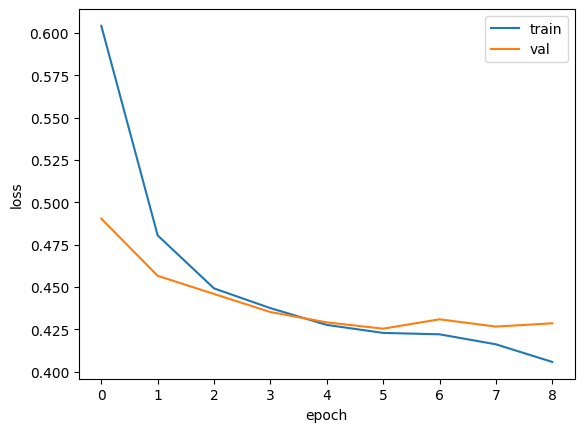

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### GRU 구조  
GRU는 Gated Recurrent Unit의 약자이다! 이건 뉴욕대의 조경현 교수가 개발한 셀로 유명하다!  
이 cell은 LSTM의 간소화 버전으로 생각할 수 있다! 이 ceell은 LSTM처럼 cell 상태를 계산하지  
않고 은닉 상태 하나만 포함하고 있다. GRU cell에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 cell이 3개 들어있다!  
2개는 sigmoid 활성화 함수를 사용하고 하나는 tanh 활성화 함수를 사용한다. 여기에서도 은닉 상태와 입력에 입력에 곱해지는 가중치를  
합쳐서 나타냈다! 맨 왼쪽에서 $w_z$를 사용하는 cell의 출력이 은닉 상태에 바로 곱해져 삭제 게이트 역할을 수행한다! 이와 똑같이 출력을  
1에서 뺀 다음에 가장 오른쪽 $w_z$를 사용하는 셀의 출력에 곱한다. 이는 입력되는 정보를 제어하는 역할을 수행한다. 가운데 $w_r$을 사용하는  
셀에서 출력된 값은 $w_s$ 셀이 사용할 은닉 상태의 정보를 제어한다!

In [15]:
model_gru = keras.Sequential()
model_gru.add(keras.layers.Input(shape=(100,)))
model_gru.add(keras.layers.Embedding(500, 16))
model_gru.add(keras.layers.GRU(8, dropout=0.2))
model_gru.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
model_gru.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_gru.fit(train_seq, train_taget, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.6371 - loss: 0.6264 - val_accuracy: 0.7240 - val_loss: 0.5380
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7615 - loss: 0.4959 - val_accuracy: 0.7640 - val_loss: 0.4820
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7810 - loss: 0.4675 - val_accuracy: 0.7778 - val_loss: 0.4654
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.7977 - loss: 0.4446 - val_accuracy: 0.7948 - val_loss: 0.4436
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.7978 - loss: 0.4383 - val_accuracy: 0.7958 - val_loss: 0.4367
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.8030 - loss: 0.4277 - val_accuracy: 0.7836 - val_loss: 0.4586
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8086 - loss: 0.4192 - val_accuracy: 0.8010 - val_loss: 0.4365
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8118 - loss: 0

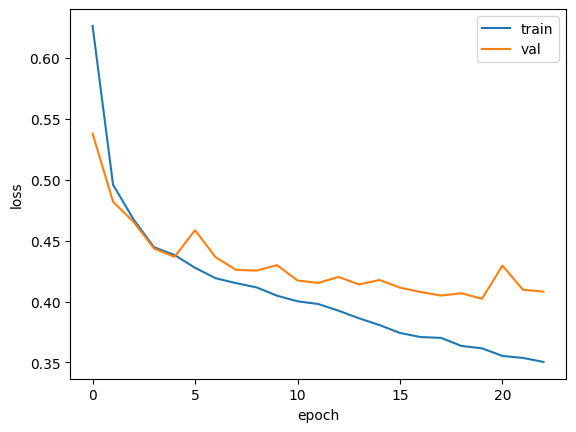

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [19]:
test_seq = pad_sequences(test_input, maxlen=100)
best_model = keras.models.load_model('best-gru-model.keras')
best_model.evaluate(test_seq, test_taget)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8233 - loss: 0.3882


[0.388197660446167, 0.8232799768447876]